# Analyzer for individual Participant results

In [22]:
#Import Statements
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import seaborn as sns
#from statannot import add_stat_annotation

sns.set()
sns.set_theme()

In [23]:
# declare global helpers
condition_values = ['0ms','10ms','400ms','10ms echo','400ms echo']
groupnames = [0,1,2,3,4]
browsernames = ["MSIE", "Firefox", "Safari", "Chrome", "Opera"]

In [24]:
#read in source csv
df = pd.read_csv(r'corr_results.csv', encoding='utf-8-sig', 
                  low_memory=False
                 )
#cut down df to individual participant
df = df[df['participant'] == 143]
# Here we can see all tracked variables
df.info()
print(list(df.columns))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 9135 to 9332
Columns: 110 entries, Unnamed: 0 to block_counter_sj
dtypes: float64(65), int64(6), object(39)
memory usage: 171.7+ KB
['Unnamed: 0', 'group', 'cont_3.rt', 'training.thisRepN', 's_adjust.thisIndex', 'item', 'SJ_trials_between.thisN', 'Name_optional', 'expName', 'training.ran', 'block_counter_choice', 'key_resp.rt', 's_adjust.thisN', 'trial_counter_sj', '__participant', 'xResolution', 'choice_response.corr', 'entity2', 'researcher', 'imagePos', 'corrAns_choice', 'imagePath2', 'SJ_trials_skip.thisN', 'cont_7.keys', 'participant', 'cont_7.rt', '__datetime', 'attribute2', 'response_distortion.corr', 'trials.thisTrialN', 'SJ_trials_before.thisTrialN', 'echo', 'response_sync.rt', 'SJ_trials_between.thisRepN', 'SJ_trials_after.thisRepN', 'SJ_trials_after.thisIndex', 'cont_2.rt', 'SJ_trials_after.ran', 'SJ_trials_between.thisIndex', 'sentence_id', 'psychopyVersion', 'latency', 'response_sync.keys', 'corrAns', 'date', '

## General Info

In [25]:
exp = df['expName'].iloc[0]
print('Exp: ',exp)
os = df['OS'].iloc[0]
print('OS: ',os)
browser = df['browser'].iloc[0]
print('Browser: ',browser)
res = (df['xResolution'].iloc[0], df['yResolution'].iloc[0])
print('Resolution: ',res)
fr = df['frameRate'].iloc[0]
print('Framerate: ',browser)
eid = df['id'].iloc[0]
print('Experiment ID: ',eid)
pid = df['participant'].iloc[0]
print('Participant ID: ',pid)
date = df['date'].iloc[0]
print('Date: ',date)
group = df['group'].iloc[0]
print('Group: ',group)
switch = df['target_loc'].median() ==  1
print('Images reversed: ',switch)
trials_ = df['trials.ran'].count()


Exp:  av_experiment
OS:  Win32
Browser:  Firefox
Resolution:  (1920, 1080)
Framerate:  Firefox
Experiment ID:  public
Participant ID:  143
Date:  2021-05-16_20h54.28.567
Group:  3
Images reversed:  True


Text(0.5, 1.0, 'Temporal Progress over blocks')

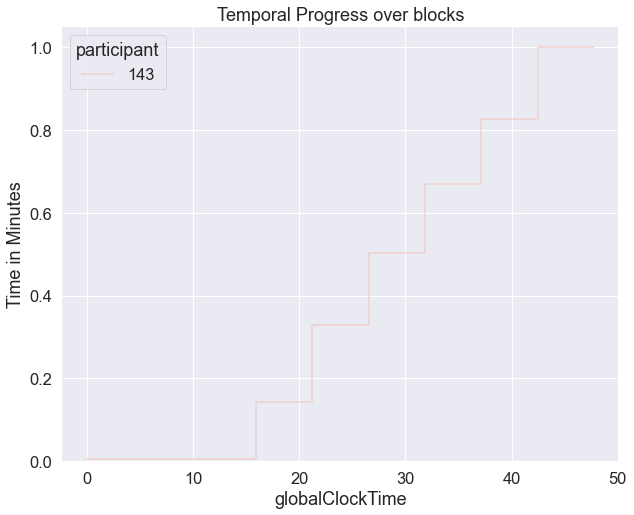

In [26]:
# plot time needed
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

time = df['globalClockTime'] / 60


sns.histplot( data=df, 
             x = time ,
             hue = 'participant',
             cumulative = True,
             element="step", fill=False,
             stat="density", 
             common_norm=False,
             #stat = 'count',
             #multiple="dodge", 
             #discrete = True,
#              shrink=.8
            )

# Change Axis labels:

#plt.xlabel('Group')
plt.ylabel('Progress')
plt.ylabel('Time in Minutes')
plt.title('Temporal Progress over blocks')

# Analysis of choice trial

In [27]:
### Divide data into subsets correct / incorrect

# Filter out incorrect responses
df_corr = df.drop(df[df['choice_response.corr'] == 0].index)
df_corr = df_corr.drop(df_corr[df_corr['target_loc'] == 2].index)
#df_corr.shape

# Filter out correct responses
df_incorr = df.drop(df[df['choice_response.corr'] == 1].index)
df_incorr = df_incorr.drop(df_incorr[df_incorr['target_loc'] == 2].index)
#df_incorr.shape

# Only Filler trials
df_filler = df.drop(df[df['target_loc'] < 2].index)
#df_filler['target_loc'].unique()
# no Filler trials
df_no_filler = df.drop(df[df['target_loc'] == 2].index)

No handles with labels found to put in legend.


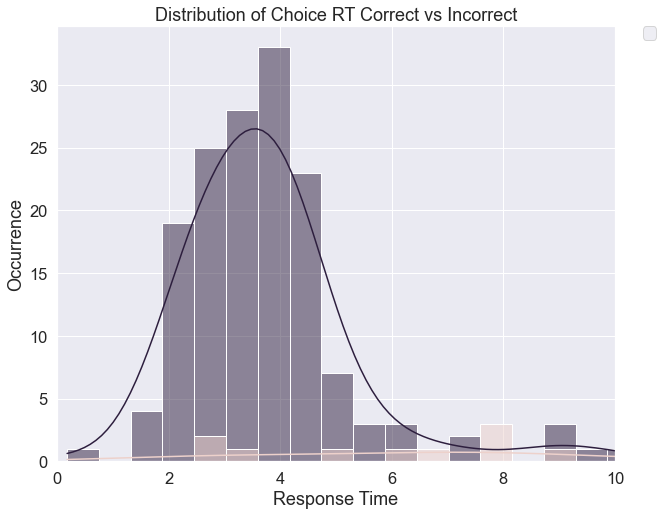

In [28]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.histplot(data = df,
             x = 'choice_response.rt',
             hue = 'choice_response.corr',
                  #col = 'imagePos',
            kde=True)



ax.set(xlim=(0, 10))


# Change Axis labels:
plt.xlabel('Response Time')
plt.ylabel('Occurrence')
plt.title('Distribution of Choice RT Correct vs Incorrect')
plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

In [29]:
trials = df['trials.ran'].count()
trials

160

 Means over conditions:  cond
0.0    4.438125
1.0    3.615515
2.0    3.914382
3.0    3.891667
4.0    4.314545
Name: choice_response.rt, dtype: float64


Text(0.5, 1.0, 'Response times over conditions in choice trial')

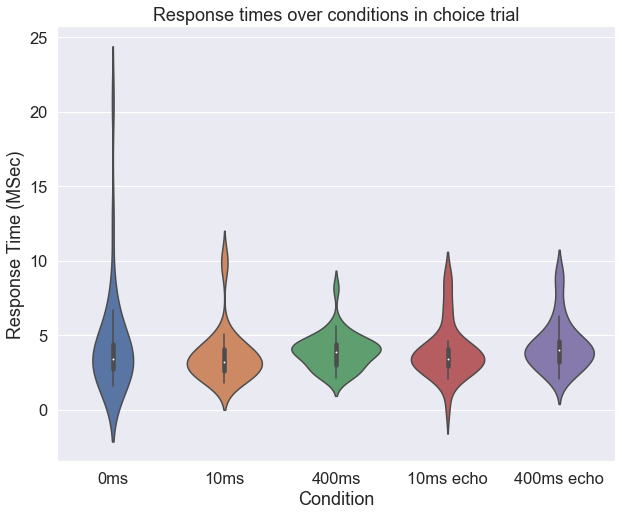

In [30]:
means_by_cond = df.groupby('cond')['choice_response.rt'].mean()
print(' Means over conditions: ', means_by_cond)

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.violinplot(y='choice_response.rt', 
               x="cond",
              data=df,
              showmeans=True).set_xticklabels(condition_values)

# Change Axis labels:
plt.xlabel('Condition')
plt.ylabel('Response Time (MSec)')
plt.title('Response times over conditions in choice trial')

Text(0.5, 1.0, 'Response times over different conditions')

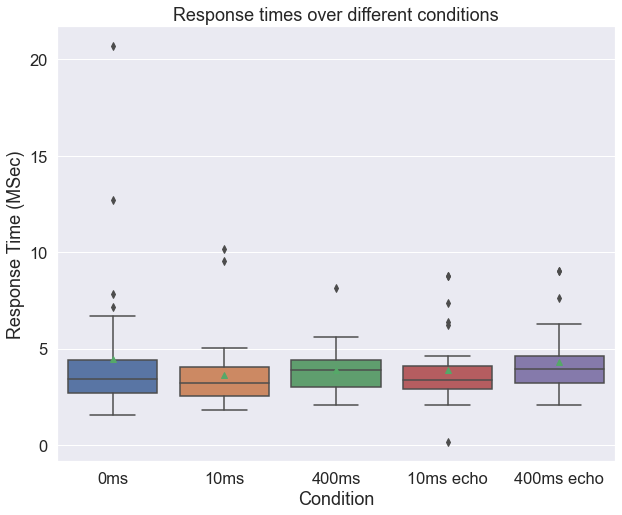

In [31]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.boxplot(y='choice_response.rt', x="cond",
              data=df,
           showmeans=True).set_xticklabels(condition_values)

# Change Axis labels:
plt.xlabel('Condition')
plt.ylabel('Response Time (MSec)')
plt.title('Response times over different conditions')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Correct Responses over conditions in choice trial')

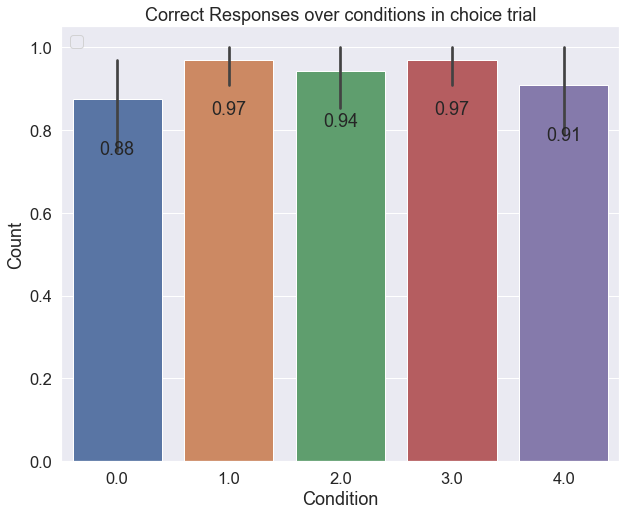

In [32]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)



ax = sns.barplot(y='choice_response.corr',
                x= 'cond',
                 data=df, 
                  #ci=None
                )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -50), 
                   textcoords = 'offset points')
# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Correct Responses over conditions in choice trial')

## Response Time over experiment Progress

No handles with labels found to put in legend.


Text(0.5, 1.0, 'RTs over all trials')

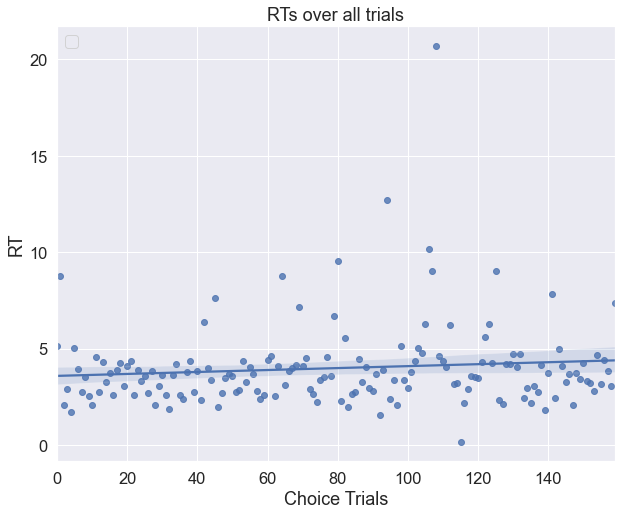

In [33]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.regplot(y='choice_response.rt',
             x='trials.thisTrialN',
            #hue = 'choice_response.corr',
              data=df)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Choice Trials')
plt.ylabel('RT')
plt.title('RTs over all trials')


In [34]:
# Filter out correct responses
df_incorr = df.drop(df[df['choice_response.corr'] == 1].index)
df_incorr = df_incorr.drop(df_incorr[df_incorr['target_loc'] == 2].index)
df_incorr.shape

(40, 110)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'RTs over all incorrectly answered trials')

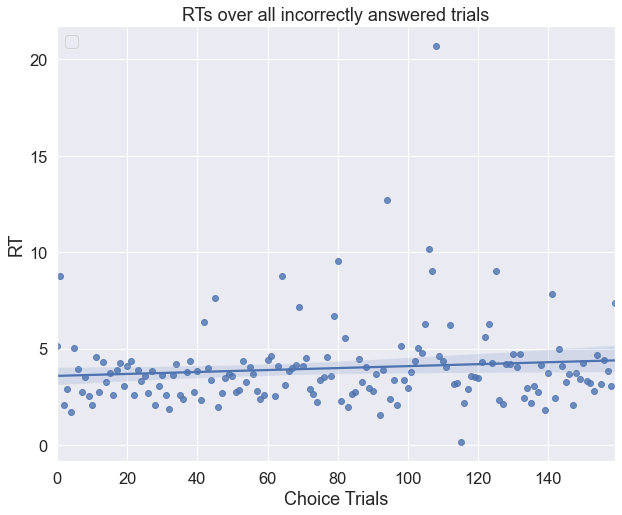

In [35]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.regplot(y='choice_response.rt',
             x='trials.thisTrialN',
            #hue = 'choice_response.corr',
              data=df)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Choice Trials')
plt.ylabel('RT')
plt.title('RTs over all incorrectly answered trials')


In [36]:
# Filter out incorrect responses
df_corr = df.drop(df[df['choice_response.corr'] == 0].index)
df_corr = df_corr.drop(df_corr[df_corr['target_loc'] == 2].index)
df_corr.shape

(170, 110)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'RTs over correctly answered non-filler trials')

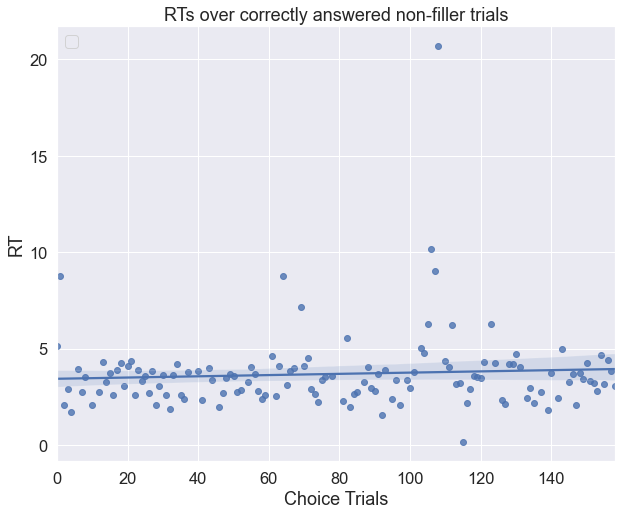

In [37]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.regplot(y='choice_response.rt',
             x='trials.thisTrialN',
            #hue = 'choice_response.corr',
              data=df_corr)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Choice Trials')
plt.ylabel('RT')
plt.title('RTs over correctly answered non-filler trials')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'RTs over filler trials')

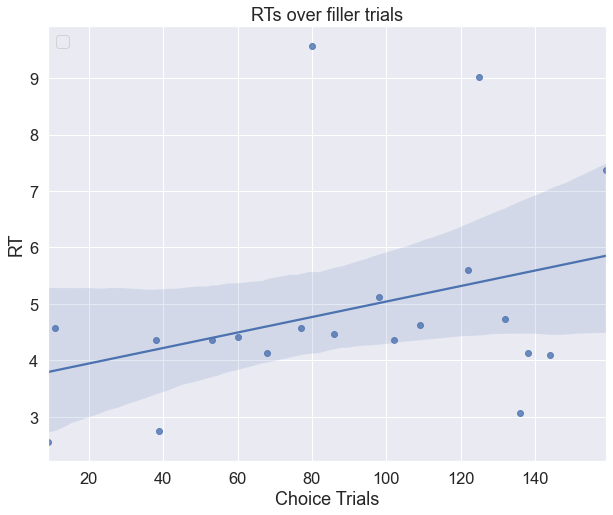

In [38]:
# Filter out incorrect responses
df_filler = df.drop(df[df['target_loc'] < 2].index)
df_filler['target_loc'].unique()

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.regplot(y='choice_response.rt',
             x='trials.thisTrialN',
            #hue = 'choice_response.corr',
              data=df_filler)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Choice Trials')
plt.ylabel('RT')
plt.title('RTs over filler trials')

Text(0.5, 1.0, 'Correct Responses over conditions in filler trials')

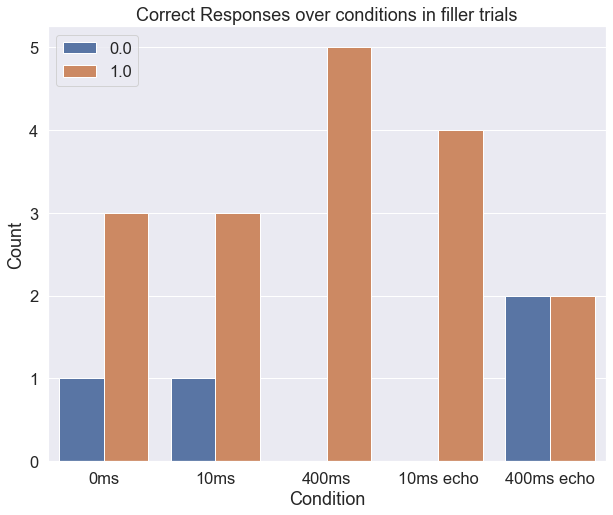

In [39]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.countplot(hue='choice_response.corr', x="cond",
              data=df_filler).set_xticklabels(condition_values)

# Change Axis labels:
plt.legend(loc = 'upper left')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Correct Responses over conditions in filler trials')

Text(0.5, 1.0, 'Correct / Incorrect RTs over all trials')

<Figure size 720x576 with 0 Axes>

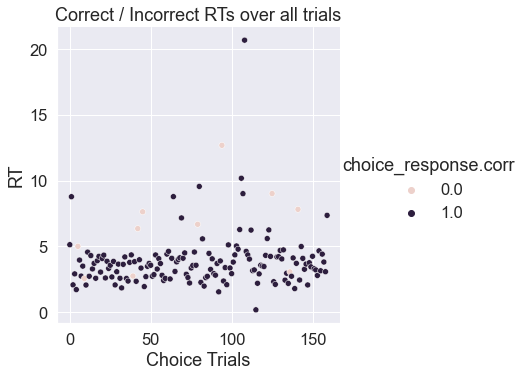

In [40]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.relplot(y='choice_response.rt',  x='trials.thisTrialN', hue="choice_response.corr", data=df);

# Change Axis labels:
plt.xlabel('Choice Trials')
plt.ylabel('RT')
plt.title('Correct / Incorrect RTs over all trials')

# Analysis of SJ task

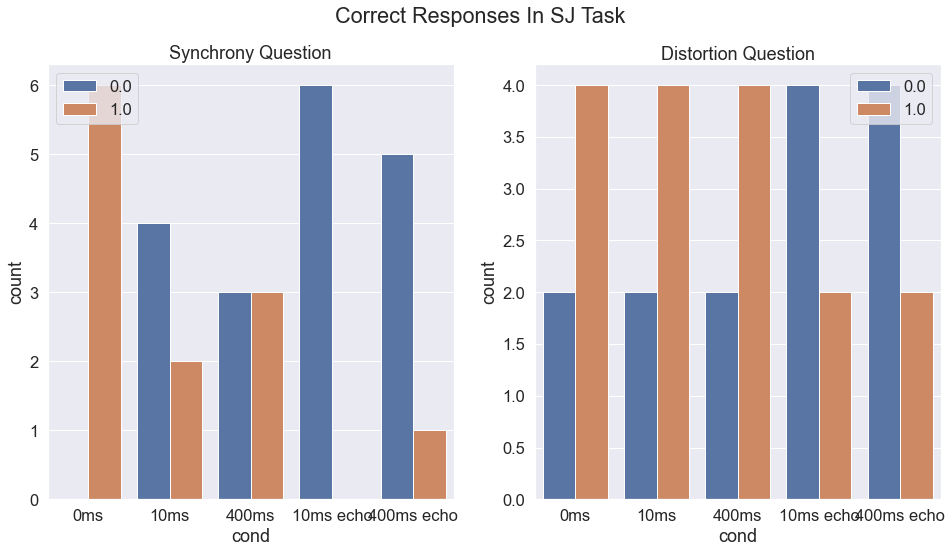

In [41]:
fig, axes = plt.subplots(1, 2)
# Change seaborn plot size
fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)


fig.suptitle('Correct Responses In SJ Task')
axes[0].set_title('Synchrony Question')
axes[1].set_title('Distortion Question')

sns.countplot(ax=axes[0],hue='response_sync.corr', x="cond",data=df).set_xticklabels(condition_values)
sns.countplot(ax=axes[1],hue='response_distortion.corr', x="cond",data=df).set_xticklabels(condition_values)

# Change Axis labels:
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper right')


ModuleNotFoundError: No module named 'statsmodels'

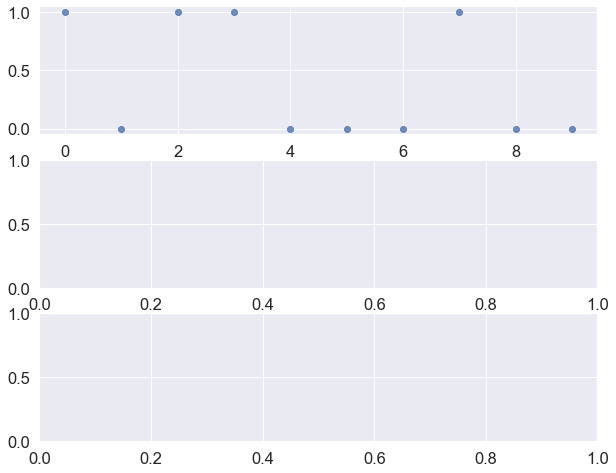

In [42]:
fig, axes = plt.subplots(3, 1)
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.regplot(y='response_sync.corr',
            x = 'SJ_trials_before.thisTrialN',
            data=df,
            truncate = True,
           logistic = True,
           ax = axes[0])
sns.regplot(y='response_sync.corr',
            x = 'SJ_trials_between.thisTrialN',
            data=df,
            truncate = True,
           logistic = True,
           ax = axes[1])

sns.regplot(y='response_sync.corr',
            x = 'SJ_trials_after.thisTrialN',
            data=df,
            truncate = True,
           logistic = True,
           ax = axes[2])


# Change Axis labels:
axes[0].set_title('Block 1')
axes[1].set_title('Block 2')
axes[2].set_title('Block 3')
plt.suptitle('Correctness of SJ synchrony answers over trials')